# Preprocessing and Analysis of Healthy Subjects in the Gait Rehabilitation Project

- Focuses on understanding gait patterns and biomechanics in healthy individuals.
- Provides baseline data for comparison with patients undergoing rehabilitation.
- Aims to identify key metrics for evaluating gait performance and recovery progress.
- Creates a new dataset that simplifies the process of data usage, from EDA, ETL and machine learning training 

In [34]:

# Import libraries
import os, sys, math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from data_preprocessing import merge_data, time_domain_features, frequency_domain_features, gait_features, cross_limb_features

# Static variables and paths
base_dir = 'Data/Healthy'

---

# Preprocessing - Feature Extraction

### Data preprocessing

- Combines data from the left and right shank into a single dataframe.
- Facilitates ease of use by consolidating information for both sides.
- Ensures consistency in data structure for analysis and modeling.
- Allows for streamlined processing and comparison of gait metrics across both sides.

### Feature Extraction
- Extract relevant **Time Domain Features** like: Mean, Standard Deviation, Maximum, Minimum, Root Mean Square, Median Absolute Deviation, Range, Interquartile Range, Skewness & Kurtosis, Zero-crossing rate, Peak count / amplitude.

- Extract relevant **Frequency Domain Features** in a 2sec windows like: Dominant frequency, Spectral entropy, Gait band energy.

- Extract relevant **Gait Features**: Stride times, Stance/swing times, Asymmetry index, Symmetry ratio.

- Extract relevant **Cross Limb Features**: Left and right stride durations, stride duration difference, stride duration symmetry ratio.


In [ ]:
# Loop over each patient folder
for patient_folder in os.listdir(base_dir):
    patient_path = os.path.join(base_dir, patient_folder)
    
    if not os.path.isdir(patient_path):
        continue 

    print(f"\nProcessing {patient_folder}...")

    # 1. Merge gyroscope data for the patient
    left_path = os.path.join(patient_path, 'LeftShank-Gyroscope.csv')
    right_path = os.path.join(patient_path, 'RightShank-Gyroscope.csv')
    merge_data(patient_path + '/', left_path, right_path, 'gyroscope')

    # 2. Run all feature extraction functions 
    time_domain_features(patient_path + '/', 'gyroscope')
    frequency_domain_features(patient_path + '/', 'gyroscope')
    gait_features(patient_path + '/', 'gyroscope')
    cross_limb_features(patient_path + '/', 'gyroscope')


Processing Patient_1...

Processing Patient_6...

Processing Patient_7...

Processing Patient_5...

Processing Patient_2...

Processing Patient_3...

Processing Patient_4...


---

# Explanatory Data Analysis

### Time Domain Features

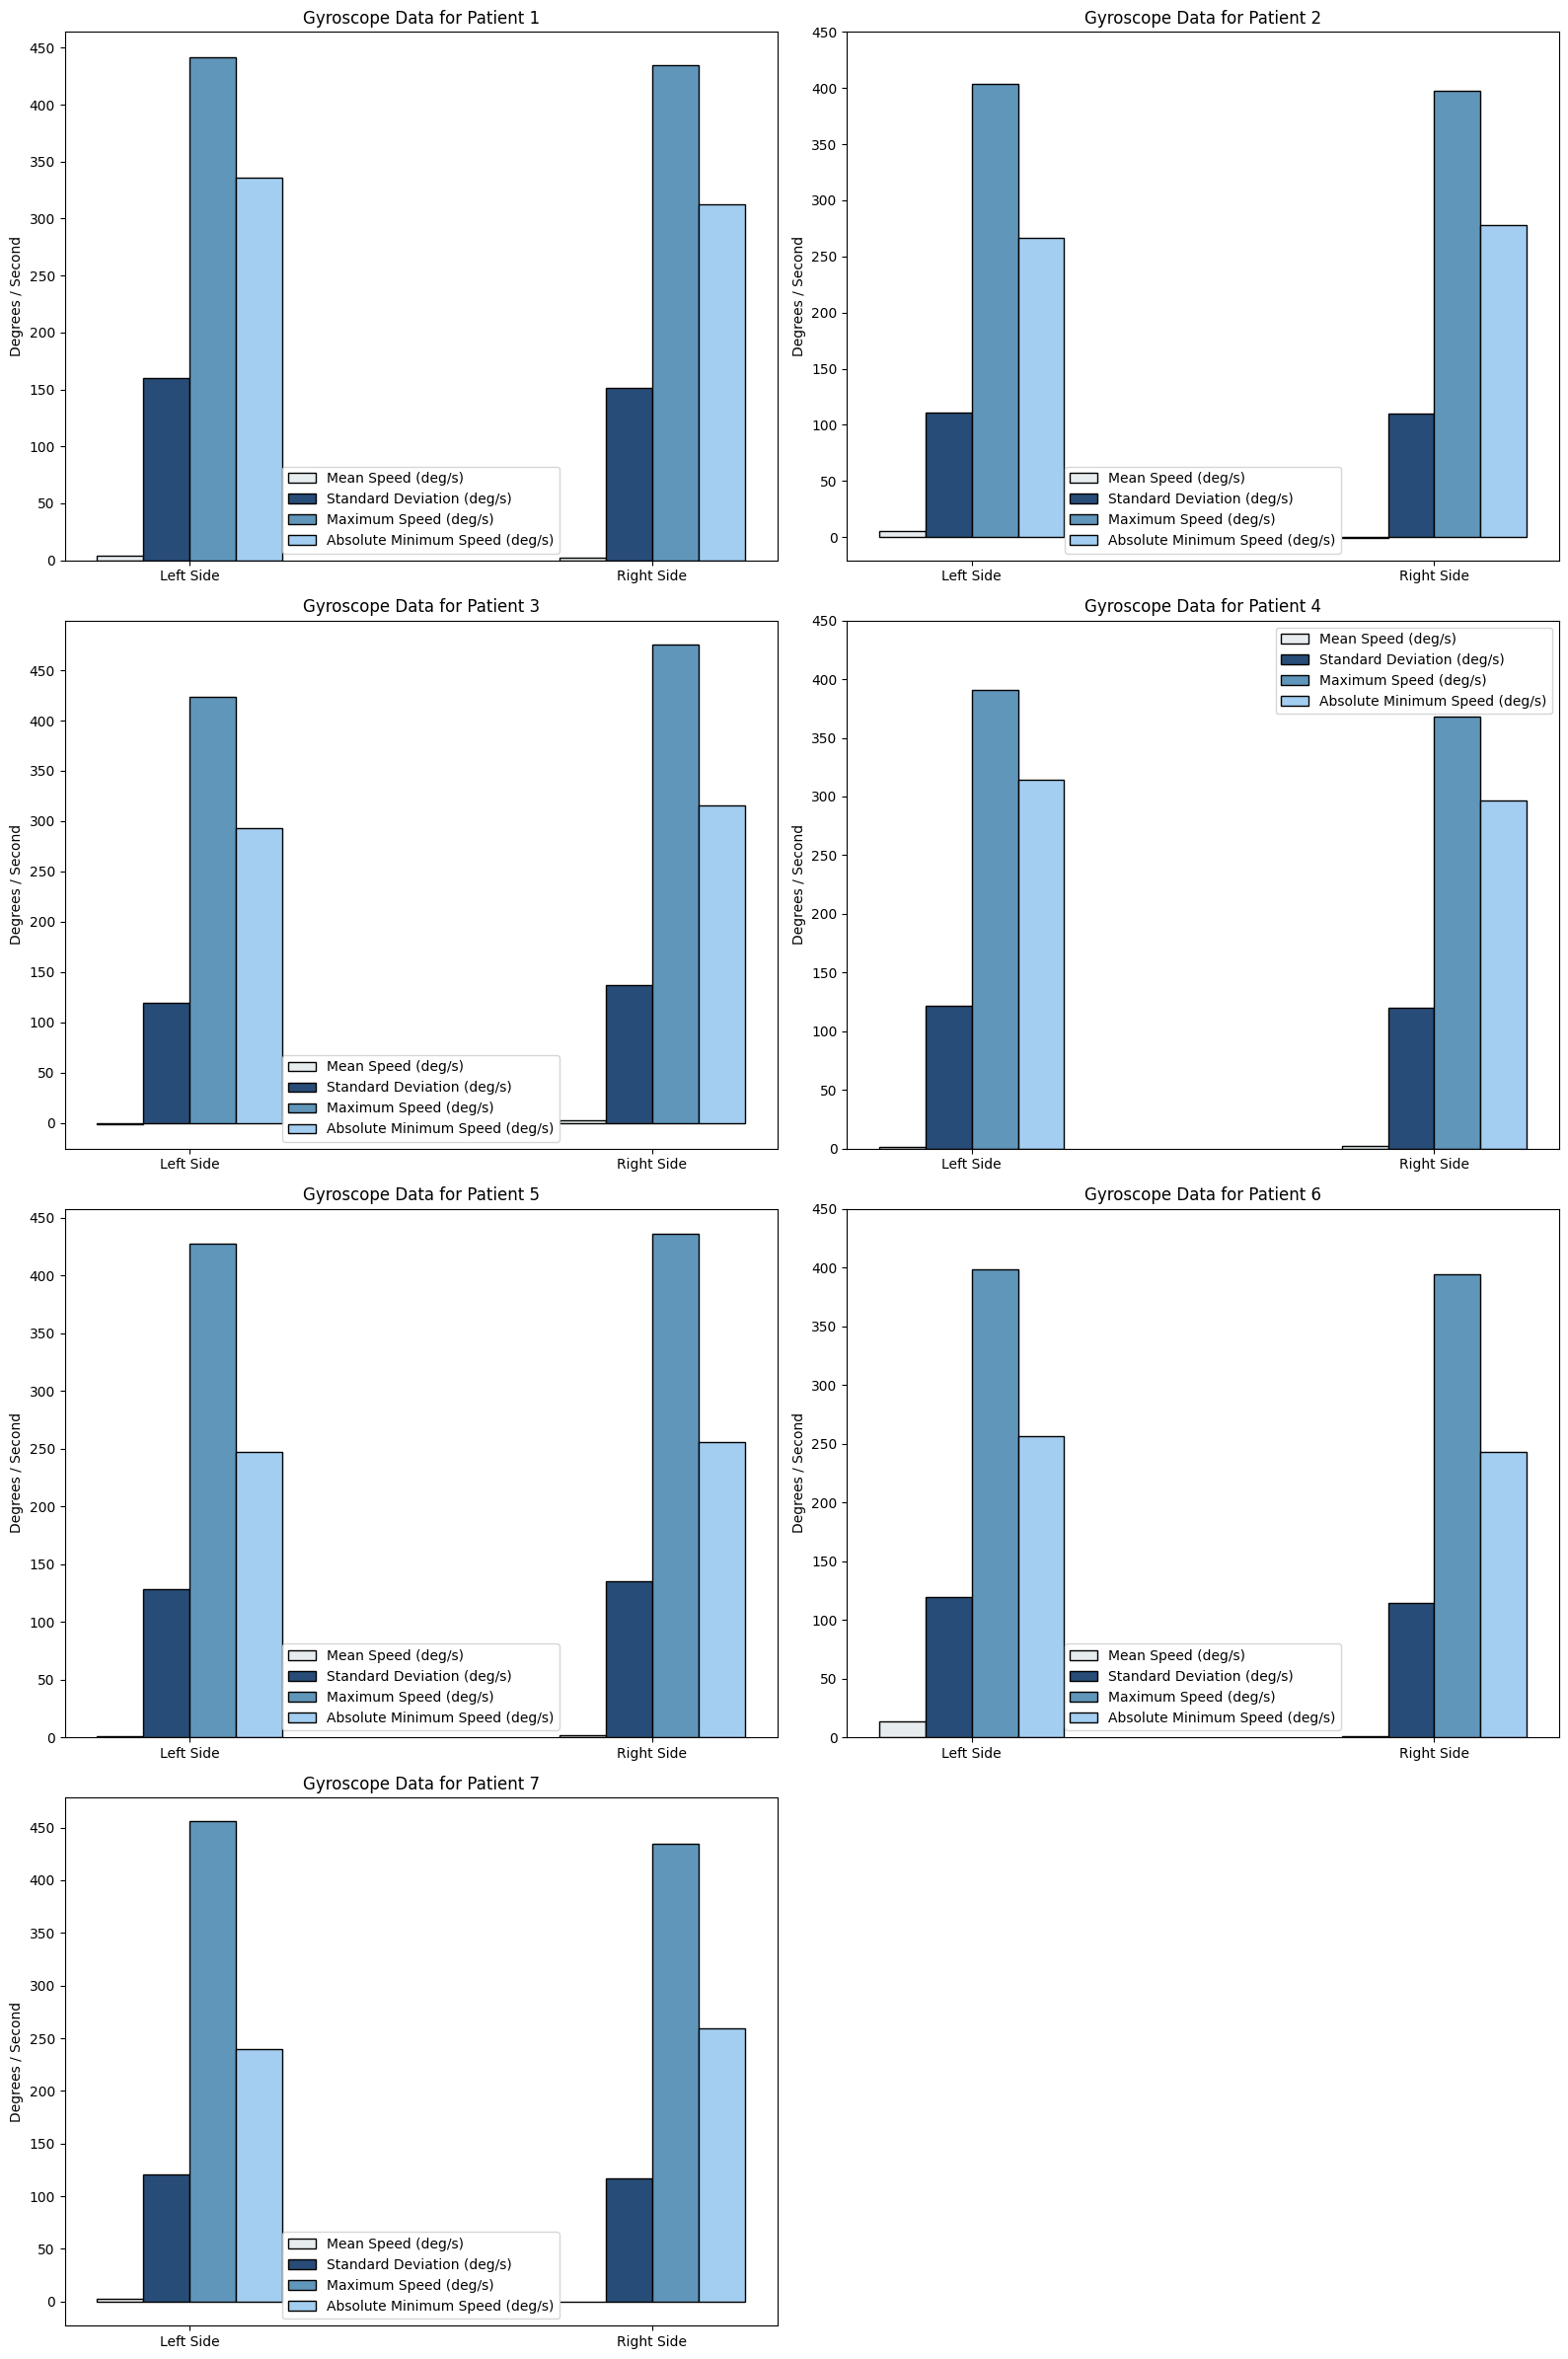

In [ ]:
# Load the Time Domain Features Metrics CSV files
time_domain_features_paths = [os.path.join(base_dir, patient_folder, 'time_domain_metrics_gyroscope.csv') for patient_folder in os.listdir(base_dir)]
time_domain_features_paths = [path for path in time_domain_features_paths if path.__contains__('.DS_Store') == False]


# Calculate number of rows needed (2 plots per row)
n_patients = len(time_domain_features_paths)
n_cols = 2
n_rows = math.ceil(n_patients / n_cols)

# Create the overall figure
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 6))
axes = axes.flatten()  # Flatten in case it's 2D array

for idx, path in enumerate(time_domain_features_paths):
    data = pd.read_csv(path)
    
    left_mean = data['left-z-axis-(deg/s)-mean']
    left_std = data['left-z-axis-(deg/s)-std']
    left_max = data['left-z-axis-(deg/s)-max']
    left_min = abs(data['left-z-axis-(deg/s)-min'])
    
    right_mean = data['right-z-axis-(deg/s)-mean']
    right_std = data['right-z-axis-(deg/s)-std']
    right_max = data['right-z-axis-(deg/s)-max']
    right_min = abs(data['right-z-axis-(deg/s)-min'])

    mean = [left_mean.iloc[0], right_mean.iloc[0]]
    std = [left_std.iloc[0], right_std.iloc[0]]
    max_ = [left_max.iloc[0], right_max.iloc[0]]
    min_ = [left_min.iloc[0], right_min.iloc[0]]

    barWidth = 0.1
    r1 = np.arange(len(mean))
    r2 = [x + barWidth for x in r1]
    r3 = [x + barWidth for x in r2]
    r4 = [x + barWidth for x in r3]
    
    ax = axes[idx]  # Select the subplot axis

    ax.bar(r1, mean, width=barWidth, color='#e7ecef', edgecolor='black', capsize=7, label='Mean Speed (deg/s)')
    ax.bar(r2, std, width=barWidth, color='#274c77', edgecolor='black', capsize=7, label='Standard Deviation (deg/s)')
    ax.bar(r3, max_, width=barWidth, color='#6096ba', edgecolor='black', capsize=7, label='Maximum Speed (deg/s)')
    ax.bar(r4, min_, width=barWidth, color='#a3cef1', edgecolor='black', capsize=7, label='Absolute Minimum Speed (deg/s)')

    ax.set_xticks([r + 1.5*barWidth for r in range(len(mean))])
    ax.set_xticklabels(['Left Side', 'Right Side'])
    ax.set_yticks(np.arange(0, 500, 50))
    ax.set_ylabel('Degrees / Second')
    ax.set_title(f'Gyroscope Data for Patient {idx + 1}')
    ax.legend()

# Hide the empty subplot if the number is odd
if n_patients % 2 != 0:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()
    


### Frequency Domain Features

In [ ]:
# Load the Time Domain Features Metrics CSV files
frequency_domain_features_paths = [os.path.join(base_dir, patient_folder, 'windowed_frequency_features_gyroscope.csv') for patient_folder in os.listdir(base_dir)]
frequency_domain_features_paths = [path for path in frequency_domain_features_paths if path.__contains__('.DS_Store') == False]


# Calculate number of rows needed (2 plots per row)
n_patients = len(frequency_domain_features_paths)
n_cols = 2
n_rows = math.ceil(n_patients / n_cols)

# Create the overall figure
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 6))
axes = axes.flatten()

for idx, path in enumerate(frequency_domain_features_paths):
    data = pd.read_csv(path)
    print(data['gait_band_energy'])

    ax = axes[idx]  # Select the subplot axis

    ax.bar(r1, mean, width=barWidth, color='#e7ecef', edgecolor='black', capsize=7, label='Mean Speed (deg/s)')
    ax.bar(r2, std, width=barWidth, color='#274c77', edgecolor='black', capsize=7, label='Standard Deviation (deg/s)')
    ax.bar(r3, max_, width=barWidth, color='#6096ba', edgecolor='black', capsize=7, label='Maximum Speed (deg/s)')
    ax.bar(r4, min_, width=barWidth, color='#a3cef1', edgecolor='black', capsize=7, label='Absolute Minimum Speed (deg/s)')

    ax.set_xticks([r + 1.5*barWidth for r in range(len(mean))])
    ax.set_xticklabels(['Left Side', 'Right Side'])
    ax.set_yticks(np.arange(0, 500, 50))
    ax.set_ylabel('Degrees / Second')
    ax.set_title(f'Gyroscope Data for Patient {idx + 1}')
    ax.legend()

# Hide the empty subplot if the number is odd
if n_patients % 2 != 0:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()
    


0    2.360559e+11
1    2.026479e+11
2    4.422900e+11
3    3.610297e+11
Name: gait_band_energy, dtype: float64
0    4.641171e+09
1    2.912014e+09
2    2.304757e+11
3    1.209481e+11
4    3.164380e+11
5    2.249079e+11
6    1.319037e+11
7    1.988761e+11
Name: gait_band_energy, dtype: float64
0    3.523524e+10
1    3.479147e+10
2    4.190764e+11
3    4.499426e+11
Name: gait_band_energy, dtype: float64
0    8.475380e+10
1    7.455746e+10
2    2.840025e+11
3    2.372769e+11
4    2.858833e+11
5    2.424705e+11
6    8.408813e+08
7    2.441648e+10
Name: gait_band_energy, dtype: float64
0    1.571920e+07
1    2.324494e+07
2    2.000320e+10
3    4.809684e+10
4    2.734743e+11
5    3.134105e+11
6    2.642477e+11
7    3.000676e+11
Name: gait_band_energy, dtype: float64
0    3.602317e+09
1    3.660754e+09
2    2.168631e+11
3    1.051079e+11
4    2.773360e+11
5    2.156843e+11
6    1.017940e+11
7    1.405400e+11
Name: gait_band_energy, dtype: float64
0    5.120526e+08
1    7.975787e+08
2    8.435